Objetivos:
1. Perceber quais são as horas com mais clientes?
2. Quais são as aulas com mais clientes?
3. Quais são os dias da semana com mais clientes?

Alterações:
1. Colocar a possibilidade de filtrar por datas
2. Utilizar um gráfico bqplot para utilizar e filtrar as datas e atualizar os outros gráficos todos

Problemas bokeh não trabalhar no voilá

# Dados recolhidos aula de grupo RM

In [53]:
import pandas as pd
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual,widgets
import plotly.offline as py
import datetime,calendar
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate


dfAG = pd.read_excel('https://raw.githubusercontent.com/pesobreiro/jupyternotebooks/master/dados/_RMAulasGrupo.xlsx',sheet_name='Sheet1')

## Preparação dos dados

cols = ['ID','E-mail', 'Nome','Pontuação total', 'Feedback do questionário', 'Pontos – Data',
        'Feedback – Data', 'Pontos – Aula', 'Feedback – Aula','Pontos – Hora aula (coloque hora:minutos ex. 09:15)',
        'Feedback – Hora aula (coloque hora:minutos ex. 09:15)', 'Pontos – Quantas pessoas aula?',
        'Feedback – Quantas pessoas aula?','Pontos – Aula2','Feedback – Aula2']
dfAG.drop(columns=cols, index=1, inplace=True)
dfAG.columns


dfAG.columns=['horaInicio','horaConclusao','data','aula','hora','pessoas','aula2']

dfAG.fillna(0,inplace=True)

#Limpar dados mal inseridos
#lambda <args> : <return Value> if <condition > ( <return value > if <condition> else <return value>)
dfAG['hora']=dfAG['hora'].apply(lambda x:str(x).replace('h',':'))
dfAG['hora']=dfAG['hora'].apply(lambda x:str(x).replace('.',':'))
dfAG['hora']=dfAG['hora'].apply(lambda x: str(x)+':00' if (len(x)==1 or len(x)==2) else x)
dfAG['hora']=dfAG['hora'].apply(lambda x: str(x)+'00' if (len(x)==3) else x)
dfAG['hora']=dfAG['hora'].apply(lambda x:str(x).replace('::',':'))
dfAG['hora']=dfAG['hora'].apply(lambda x:str(x).replace('m',''))
dfAG['hora']=dfAG['hora'].apply(lambda x:str(x).replace(' ','00'))
dfAG['hora']=dfAG['hora'].apply(lambda x:str(x).replace('1000','10'))

dfAG.hora=pd.to_datetime(dfAG['hora'],format='%H:%M', errors='coerce')
dfAG.dropna(subset=['hora'],inplace=True)

#Vamos retirar as meias horas
dfAG['hora']=dfAG['hora'].apply(lambda x: x.hour)

### Calcular o dia da semana

# Por extenso
#dfSEAlv['diaSemana']=dfSEAlv['data'].apply(lambda x: x.day_name(locale='pt'))
# Vamos calcular o dia da semana 0 é segunda
dfAG['diaSemana']=dfAG['data'].apply(lambda x: x.weekday())

#Calcular o mês
dfAG['mes']=dfAG['data'].apply(lambda x: x.month)

#Limpar dados mal inseridos
['Sós abs', 'Sós bunda', '100 panca', 'Sos abs', 'Bodybalance','Bunda', 'Sos bunda', 'Bodypump', 'Step', 'Sós popey ',
 'Body Combat', 'Pilates', 'Endurance ', 'Sos speeding ','Sos bunda ', 'Sos abs ', 'Popeye', 'Extreme', 'Speeding',
 'Body pump', 'Endurance', 'Sos speeding', 'Speeding ','Sem stress ', '100stress', 'Gain', 'Body pump ', 'sos abs',
 'Sós bunda ', 'Sos celulite', 'Bodypump ', 'Sos popeye','Enfurance', '100Pança', 'Bodybalance ', '100 pança',
 'Body combat', 'Sos Popeye', 'Soso abs', 'Body Pump','Body balance', '100panca ', 'Sem stress', '100panca', 'Zumba',
 'Xtreme', '100 pança ', 'Sós popey', 'Bodycombat ', '100 stress ','Popey', 'Speedng', 'Sos celulite ', 'Sos ABS', '100 stress',
 'Gain ', 'Sós  abs', 'Bodupump', '(Sos abs) (com sos bunda)']
#lambda <args> : <return Value> if <condition > ( <return value > if <condition> else <return value>)
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).lower())
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace(' ',''))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('sós','sos'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('enfurance','endurance'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('sem','100'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('panca','pança'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('popey','popeye'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('popeyee','popeye'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('xtreme','extreme'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('speedng','speeding'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('popeyeee','popeye'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('eeeeextreme','extreme'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('eeeextreme','extreme'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('eextreme','extreme'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('(sosabs)(comsosbunda)','sosabs'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('sosspeeding','speeding'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('bodupump','bodypump'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('sospopeyee','sospopeye'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('bodypumpp','bodypump'))
#dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('popeye','sospopeye')) Vamos manter as duas são coisas diferentes
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('sospopeyee','sospopeye'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('sossospopeye','sospopeye'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('sossospopeye','sospopeye'))


for index, row in dfAG.iterrows():
    if row.aula2 != 0:
        dfAG.at[index,'aula'] = row.aula2    

dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('s.o.sabs','sosabs'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('gain-pernaseglúteo','gain-glúteoepernas'))

# Vamos agregar aulas
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('bodycombate','bodycombat'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('doscelulite','soscelulite'))

dfAG.aula=dfAG.aula.loc[dfAG.aula != 'pump']
dfAG.aula=dfAG.aula.loc[dfAG.aula != 'combat']
#dfAG.aula=dfAG.aula.loc[dfAG.aula != 'bunda']
dfAG.aula=dfAG.aula.loc[dfAG.aula != 'gain-glúteoepernas']

In [78]:
cor = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 
       'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
       'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
       'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
       'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 
       'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 
       'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 
       'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 
       'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 
       'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 
       'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 
       'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 
       'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 
       'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 
       'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 
       'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

In [54]:
print('Data inicio: ',dfAG.data.min(),'Data fim:',dfAG.data.max())

Data inicio:  2019-12-04 00:00:00 Data fim: 2020-02-11 00:00:00


Os dados são referentes ao período entre data inicio e data fim. Vamos confirmar algums dados

In [55]:
cols = ['aula','pessoas']

dfAG.pessoas=pd.to_numeric(dfAG['pessoas'], errors='coerce',downcast='integer')
#pd.to_numeric(dfAG['pessoas'], errors='coerce')
#dfAG.dropna(subset=['pessoas'],inplace=True)

In [56]:
funcao = [('soma',np.sum),('media',np.mean),('mediana',np.median), ('máx',np.max) ,('min',np.min)]
todasAulas = ['sospopeye', 'speeding', 'pilates', 'bodypump', 'step','soscelulite', 'sosabs', 'sosbunda', 
              'bodybalance', 'endurance','bodycombat', 'zumba', '100pança', 'gain', '100stress']
cardio = ['speeding','endurance','bodycombat','zumba', '100stress','step']
forca = ['sospopeye','popeye','sosabs','sosbunda','gain','bodypump','soscelulite','100pança','bunda']
relaxamento = ['bodybalance','yoga','pilates']

opcoes = [('cardio',cardio),('forca',forca),('relaxamento',relaxamento),('todas',todasAulas)]

## Número de clientes por hora

A barra preta representa o intervalo de confiança com 95%, i.e. o número de clientes tem uma estimativa limite minimo e máximo por hora de acordo com o registos nessa hora

In [57]:
# Vamos selecionar as colunas SOS e sem SOS
comsos= ['soscelulite','sosabs', 'sosbunda', 'sospopeye', 'sosspeeding']
semsos=['popeye', 'speeding', 'pilates', 'bodypump', 'step','bodybalance', 'endurance','bodycombat', 'zumba', '100pança', 'gain','100stress','bunda']

In [58]:
def f(funcao,sos,porMes,mes):
    if porMes == True:
        dados = dfAG.loc[dfAG['mes'] == mes]
    else:
        dados = dfAG
    if sos == True:
        dados=dados.loc[dados['aula'].isin(comsos)]
    else:
        dados=dados.loc[dados['aula'].isin(semsos)]
        
    if dados.empty:
        print('Não tem dados')
    else:
        plt.rcParams['figure.figsize'] = [15, 3]
        sns.barplot(x='hora',y='pessoas',data=dados,palette='rainbow',estimator=funcao).set_title('Aulas de Grupo RM')
        plt.xticks(rotation=0);
        fig = plt.gcf() # "Get current figure"
        plt.show()

interact(f, funcao=funcao,sos=True,porMes=True,mes=widgets.IntSlider(min=1,max=12,step=1,value=1));

interactive(children=(Dropdown(description='funcao', options=(('soma', <function sum at 0x000001C4F6947678>), …

## Clientes por dia semana

In [59]:
def f(funcao,sos):
    if sos == True:
        dados=dfAG.loc[dfAG['aula'].isin(comsos)]
    else:
        dados=dfAG.loc[dfAG['aula'].isin(semsos)]
        
    plt.rcParams['figure.figsize'] = [15, 3]
    sns.barplot(x='diaSemana',y='pessoas',data=dados,palette='rainbow',estimator=funcao).set_title('Aulas de Grupo RM')
    plt.xticks(np.arange(7),('seg','ter','qua','qui','sex','sab','dom'))
    fig = plt.gcf() # "Get current figure"
    plt.show()

interact(f, funcao=funcao,sos=True);

interactive(children=(Dropdown(description='funcao', options=(('soma', <function sum at 0x000001C4F6947678>), …

## Clientes por hora e aula

In [60]:
def f(cor,funcao,tipo,sos):
    if sos == True:
        dados=dfAG.loc[dfAG['aula'].isin(comsos)]
    else:
        dados=dfAG.loc[dfAG['aula'].isin(semsos)]
    plt.rcParams['figure.figsize'] = [15, 6]
    if dados.loc[dados['aula'].isin(tipo)].empty:
        print('Não tem dados')
    else:
        sns.lineplot(x='hora',y='pessoas',hue='aula',data=dados.loc[dados['aula'].isin(tipo)],palette=cor,
                     estimator=funcao,ci=0).set_title('Aulas Grupo RM - '+str(tipo));
        fig = plt.gcf() # "Get current figure"
        plt.show()

interact(f,cor=cor,funcao=funcao,tipo=opcoes,sos=True);

interactive(children=(Dropdown(description='cor', options=('Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', '…

In [61]:
def f(aula,funcao):
    plt.rcParams['figure.figsize'] = [15, 4]
    sns.barplot(x='hora',y='pessoas',hue='aula',data=dfAG[dfAG.aula==aula],palette='rainbow',
                 estimator=funcao,ci=0).set_title('Sala de exercicio RM');
    
    fig = plt.gcf() # "Get current figure"
    plt.show()

interact(f, aula=dfAG.aula.unique(),funcao=funcao);

interactive(children=(Dropdown(description='aula', options=('popeye', 'speeding', nan, 'pilates', 'bodypump', …

### Quais são as aulas com mais alunos por dia da semana?

In [62]:
def f(funcao,tipo,sos):
    if sos == True:
        dados=dfAG.loc[dfAG['aula'].isin(comsos)]
    else:
        dados=dfAG.loc[dfAG['aula'].isin(semsos)]    
    plt.rcParams['figure.figsize'] = [20, 5]
    #plt.xticks(rotation=45);
    if dados.loc[dados['aula'].isin(tipo)].empty:
        print('Não tem dados')
    else:
        sns.barplot(x='aula',y='pessoas',hue='diaSemana',
                    data=dados.loc[dados['aula'].isin(tipo)],
                    palette='Accent',estimator=funcao).set_title('Sala exercício RM')
    
        fig = plt.gcf() # "Get current figure"
    

interact(f,funcao=funcao,tipo=opcoes,sos=True);

interactive(children=(Dropdown(description='funcao', options=(('soma', <function sum at 0x000001C4F6947678>), …

## Mapa de utilização 

In [63]:
dfAG['dia']=dfAG['data'].apply(lambda x: x.day)

In [64]:
diaSemana = [('seg',0),
          ('ter',1),
          ('qua',2),
          ('qui',3),
          ('sex',4),
          ('sab',5),
          ('dom',6)]

In [65]:
#np.round(pd.pivot_table(dfAG,values='pessoas',index='hora',columns=['aula'],aggfunc=np.mean,margins=True,fill_value=0))

In [66]:
def f(funcao,dia,sos,porMes,mes):
    if porMes == True:
        dados = dfAG.loc[dfAG['mes'] == mes]
    else:
        dados = dfAG
    if sos == True:
        dados=dados.loc[dados['aula'].isin(comsos)]
    else:
        dados=dados.loc[dados['aula'].isin(semsos)]
        
    if dados.empty:
        print('Não tem dados')
    else:
        dados=dados.loc[dados['diaSemana']==dia]
        quadro = np.round(pd.pivot_table(dados,values='pessoas',index='hora',columns=['aula'],aggfunc=funcao,margins=True,fill_value=0))
        #print(quadro)
        print(tabulate(quadro,tablefmt='github',floatfmt=".2f",headers=quadro.columns))
        #print('\nPor dia do mês:')
        #quadro2 = pd.pivot_table(dados,values='pessoas',index='hora',columns=['dia'],aggfunc=funcao,margins=True,fill_value=0)
        #print(tabulate(quadro2,floatfmt=".1f",headers=['hora']+list(range(dados.dia.min(),dados.dia.max()+1))+['total']))
        quadro.to_html()

interact(f, funcao=funcao,dia=diaSemana,sos=True,porMes=True,mes=widgets.IntSlider(min=1,max=12,step=1,value=1));

interactive(children=(Dropdown(description='funcao', options=(('soma', <function sum at 0x000001C4F6947678>), …

## Evolução clientes aulas de grupo

### Dados históricos

In [67]:
#dfAG.groupby('data')['pessoas'].sum().reset_index()

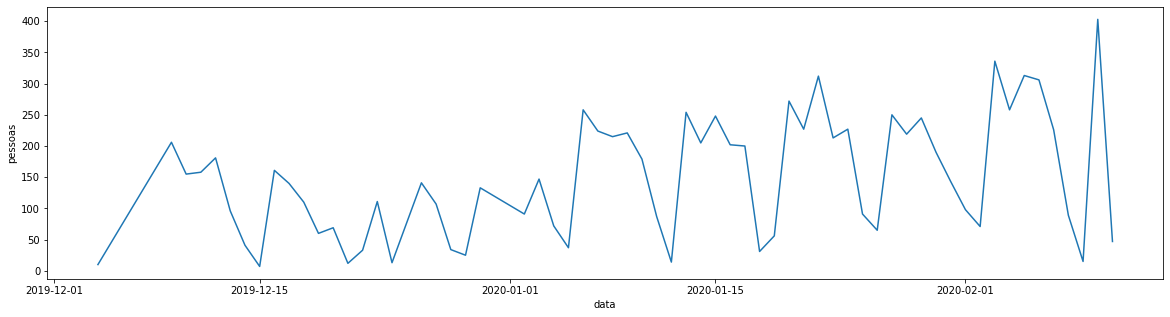

In [68]:
sns.lineplot(x="data", y="pessoas", data=dfAG.groupby('data')['pessoas'].sum().reset_index());

In [131]:
#from bokeh.plotting import figure, output_file, show
#from bokeh.io import output_notebook
#from bokeh.models import HoverTool
#from bqplot import pyplot as plt
#import ipywidgets as widgets
#
#output_notebook()
#
#def f(aula):
#    dados=dfAG[dfAG.aula==aula]
#    dados = dados.groupby('data')['pessoas'].sum().reset_index()
#    # Format the tooltip
#    tooltips = [("valor", "@pessoas")]
#
#    plot = figure(title='Evolução clientes', x_axis_label='Data',y_axis_label='Clientes',plot_width=1100,plot_height=300,x_axis_type="datetime")
#    plot.xaxis.major_label_orientation = 3.14/2
#    plot.xaxis.ticker.desired_num_ticks = int(len(dfAG.data.unique()))
#    plot.line('data', 'pessoas', line_width=2, line_color='orange', legend_label='total clientes',source=dados)
#    plot.add_tools(HoverTool(tooltips=tooltips))
#    plot.circle('data', 'pessoas',source=dados)
#
#    show(plot)
#
#interact(f, aula=dfAG.aula.unique());
#
#

In [70]:
#import warnings
#warnings.simplefilter('ignore')

In [71]:
##!pip install fbprophet
#from fbprophet import Prophet
#
#dados = dfAG.groupby('data')['pessoas'].sum().reset_index()
#    
## Renomear as colunas
#dados.columns = ['ds','y']
## Instanciação
#pro = Prophet()
#pro.fit(dados)
#
#future = pro.make_future_dataframe(periods=60,freq='D')
##print(future.tail())
#forecast = pro.predict(future)
#fig1=pro.plot(forecast)

ModuleNotFoundError: No module named 'fbprophet'

# Dados recolhidos aula de grupo Alv

In [97]:
import pandas as pd
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual,widgets
import plotly.offline as py
import datetime,calendar
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate


dfAG = pd.read_excel('https://raw.githubusercontent.com/pesobreiro/jupyternotebooks/master/dados/_ALVAulasGrupo.xlsx',sheet_name='Sheet1')

## Preparação dos dados

cols = ['ID','E-mail', 'Nome','Pontuação total', 'Feedback do questionário', 'Pontos – Data',
        'Feedback – Data', 'Pontos – Aula', 'Feedback – Aula','Pontos – Hora aula (coloque hora:minutos ex. 09:15)',
        'Feedback – Hora aula (coloque hora:minutos ex. 09:15)', 'Pontos – Quantas pessoas aula?',
        'Feedback – Quantas pessoas aula?','Pontos – Aula2','Feedback – Aula2']
dfAG.drop(columns=cols, index=1, inplace=True)
dfAG.columns


dfAG.columns=['horaInicio','horaConclusao','data','aula','hora','pessoas','aula2']

dfAG.fillna(0,inplace=True)

#Limpar dados mal inseridos
#lambda <args> : <return Value> if <condition > ( <return value > if <condition> else <return value>)
dfAG['hora']=dfAG['hora'].apply(lambda x:str(x).replace('h',':'))
dfAG['hora']=dfAG['hora'].apply(lambda x:str(x).replace('.',':'))
dfAG['hora']=dfAG['hora'].apply(lambda x: str(x)+':00' if (len(x)==1 or len(x)==2) else x)
dfAG['hora']=dfAG['hora'].apply(lambda x: str(x)+'00' if (len(x)==3) else x)
dfAG['hora']=dfAG['hora'].apply(lambda x:str(x).replace('::',':'))
dfAG['hora']=dfAG['hora'].apply(lambda x:str(x).replace('m',''))
dfAG['hora']=dfAG['hora'].apply(lambda x:str(x).replace(' ','00'))
dfAG['hora']=dfAG['hora'].apply(lambda x:str(x).replace('1000','10'))

dfAG.hora=pd.to_datetime(dfAG['hora'],format='%H:%M', errors='coerce')
dfAG.dropna(subset=['hora'],inplace=True)

#Vamos retirar as meias horas
dfAG['hora']=dfAG['hora'].apply(lambda x: x.hour)

### Calcular o dia da semana

# Por extenso
#dfSEAlv['diaSemana']=dfSEAlv['data'].apply(lambda x: x.day_name(locale='pt'))
# Vamos calcular o dia da semana 0 é segunda
dfAG['diaSemana']=dfAG['data'].apply(lambda x: x.weekday())

#Calcular o mês
dfAG['mes']=dfAG['data'].apply(lambda x: x.month)

#Limpar dados mal inseridos
['Sós abs', 'Sós bunda', '100 panca', 'Sos abs', 'Bodybalance','Bunda', 'Sos bunda', 'Bodypump', 'Step', 'Sós popey ',
 'Body Combat', 'Pilates', 'Endurance ', 'Sos speeding ','Sos bunda ', 'Sos abs ', 'Popeye', 'Extreme', 'Speeding',
 'Body pump', 'Endurance', 'Sos speeding', 'Speeding ','Sem stress ', '100stress', 'Gain', 'Body pump ', 'sos abs',
 'Sós bunda ', 'Sos celulite', 'Bodypump ', 'Sos popeye','Enfurance', '100Pança', 'Bodybalance ', '100 pança',
 'Body combat', 'Sos Popeye', 'Soso abs', 'Body Pump','Body balance', '100panca ', 'Sem stress', '100panca', 'Zumba',
 'Xtreme', '100 pança ', 'Sós popey', 'Bodycombat ', '100 stress ','Popey', 'Speedng', 'Sos celulite ', 'Sos ABS', '100 stress',
 'Gain ', 'Sós  abs', 'Bodupump', '(Sos abs) (com sos bunda)']
#lambda <args> : <return Value> if <condition > ( <return value > if <condition> else <return value>)
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).lower())
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace(' ',''))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('sós','sos'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('enfurance','endurance'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('sem','100'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('panca','pança'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('popey','popeye'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('popeyee','popeye'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('xtreme','extreme'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('speedng','speeding'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('popeyeee','popeye'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('eeeeextreme','extreme'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('eeeextreme','extreme'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('eextreme','extreme'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('(sosabs)(comsosbunda)','sosabs'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('sosspeeding','speeding'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('bodupump','bodypump'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('sospopeyee','sospopeye'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('bodypumpp','bodypump'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('popeye','sospopeye'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('sospopeyee','sospopeye'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('sossospopeye','sospopeye'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('sossospopeye','sospopeye'))


for index, row in dfAG.iterrows():
    if row.aula2 != 0:
        dfAG.at[index,'aula'] = row.aula2    

dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('sosoabs','sosabs'))
dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('bodybolance','bodybalance'))
#
## Vamos agregar aulas
#dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('bodycombate','bodycombat'))
#dfAG['aula']=dfAG['aula'].apply(lambda x:str(x).replace('doscelulite','soscelulite'))
#
#dfAG.aula=dfAG.aula.loc[dfAG.aula != 'pump']
#dfAG.aula=dfAG.aula.loc[dfAG.aula != 'combat']
#dfAG.aula=dfAG.aula.loc[dfAG.aula != 'gain-glúteoepernas']

In [98]:
#dfAG.to_excel('../dados/analiseExcel_AGAlv.xlsx')

In [99]:
print('Data inicio: ',dfAG.data.min(),'Data fim:',dfAG.data.max())

Data inicio:  2019-12-09 00:00:00 Data fim: 2020-02-11 00:00:00


Os dados são referentes ao período entre data inicio e data fim. Vamos confirmar algums dados

In [100]:
cols = ['aula','pessoas']

dfAG.pessoas=pd.to_numeric(dfAG['pessoas'], errors='coerce',downcast='integer')
#pd.to_numeric(dfAG['pessoas'], errors='coerce')
#dfAG.dropna(subset=['pessoas'],inplace=True)

In [101]:
funcao = [('soma',np.sum),('media',np.mean),('mediana',np.median), ('máx',np.max) ,('min',np.min)]
todasAulas = ['sospopeye', 'speeding', 'pilates', 'bodypump', 'step','soscelulite', 'sosabs', 'sosbunda', 
              'bodybalance', 'endurance','bodycombat', 'zumba', '100pança', 'gain', '100stress']
cardio = ['speeding','endurance','bodycombat','zumba', '100stress','step']
forca = ['sospopeye','popeye','sosabs','sosbunda','gain','bodypump','soscelulite','100pança','bunda']
relaxamento = ['bodybalance','yoga','pilates']

opcoes = [('cardio',cardio),('forca',forca),('relaxamento',relaxamento),('todas',todasAulas)]

## Número de clientes por hora

A barra preta representa o intervalo de confiança com 95%, i.e. o número de clientes tem uma estimativa limite minimo e máximo por hora de acordo com o registos nessa hora

In [102]:
# Vamos selecionar as colunas SOS e sem SOS
comsos= ['soscelulite','sosabs', 'sosbunda', 'sospopeye', 'sosspeeding']
semsos=['popeye', 'speeding', 'pilates', 'bodypump', 'step','bodybalance', 'endurance','bodycombat', 'zumba', '100pança', 'gain','100stress','bunda']

In [103]:
def f(funcao,sos,porMes,mes):
    if porMes == True:
        dados = dfAG.loc[dfAG['mes'] == mes]
    else:
        dados = dfAG
    if sos == True:
        dados=dados.loc[dados['aula'].isin(comsos)]
    else:
        dados=dados.loc[dados['aula'].isin(semsos)]
        
    if dados.empty:
        print('Não tem dados')
    else:
        plt.rcParams['figure.figsize'] = [15, 3]
        sns.barplot(x='hora',y='pessoas',data=dados,palette='rainbow',estimator=funcao).set_title('Aulas de Grupo Alv')
        plt.xticks(rotation=0);
        fig = plt.gcf() # "Get current figure"
        plt.show()

interact(f, funcao=funcao,sos=True,porMes=True,mes=widgets.IntSlider(min=1,max=12,step=1,value=1));

interactive(children=(Dropdown(description='funcao', options=(('soma', <function sum at 0x000001C4F6947678>), …

## Clientes por dia semana

In [104]:
def f(funcao,sos):
    if sos == True:
        dados=dfAG.loc[dfAG['aula'].isin(comsos)]
    else:
        dados=dfAG.loc[dfAG['aula'].isin(semsos)]
        
    plt.rcParams['figure.figsize'] = [15, 3]
    sns.barplot(x='diaSemana',y='pessoas',data=dados,palette='rainbow',estimator=funcao).set_title('Aulas de Grupo Alv')
    plt.xticks(np.arange(7),('seg','ter','qua','qui','sex','sab','dom'))
    fig = plt.gcf() # "Get current figure"
    plt.show()

interact(f, funcao=funcao,sos=True);

interactive(children=(Dropdown(description='funcao', options=(('soma', <function sum at 0x000001C4F6947678>), …

## Clientes por hora e aula

In [105]:
def f(cor,funcao,tipo,sos):
    if sos == True:
        dados=dfAG.loc[dfAG['aula'].isin(comsos)]
    else:
        dados=dfAG.loc[dfAG['aula'].isin(semsos)]
    plt.rcParams['figure.figsize'] = [15, 6]
    if dados.loc[dados['aula'].isin(tipo)].empty:
        print('Não tem dados')
    else:
        sns.lineplot(x='hora',y='pessoas',hue='aula',data=dados.loc[dados['aula'].isin(tipo)],palette=cor,
                     estimator=funcao,ci=0).set_title('Aulas Grupo Alv - '+str(tipo));
        fig = plt.gcf() # "Get current figure"
        plt.show()

interact(f,cor=cor,funcao=funcao,tipo=opcoes,sos=True);

interactive(children=(Dropdown(description='cor', options=('Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', '…

In [106]:
def f(aula,funcao):
    plt.rcParams['figure.figsize'] = [15, 4]
    sns.barplot(x='hora',y='pessoas',hue='aula',data=dfAG[dfAG.aula==aula],palette='rainbow',
                 estimator=funcao,ci=0).set_title('Sala de exercicio Alv');
    
    fig = plt.gcf() # "Get current figure"
    plt.show()

interact(f, aula=dfAG.aula.unique(),funcao=funcao);

interactive(children=(Dropdown(description='aula', options=('sosabs', 'sosbunda', '100pança', 'bodybalance', '…

### Quais são as aulas com mais alunos por dia da semana?

In [107]:
def f(funcao,tipo,sos):
    if sos == True:
        dados=dfAG.loc[dfAG['aula'].isin(comsos)]
    else:
        dados=dfAG.loc[dfAG['aula'].isin(semsos)]    
    plt.rcParams['figure.figsize'] = [20, 5]
    #plt.xticks(rotation=45);
    if dados.loc[dados['aula'].isin(tipo)].empty:
        print('Não tem dados')
    else:
        sns.barplot(x='aula',y='pessoas',hue='diaSemana',
                    data=dados.loc[dados['aula'].isin(tipo)],
                    palette='Accent',estimator=funcao).set_title('Sala exercício Alv')
    
        fig = plt.gcf() # "Get current figure"
    

interact(f,funcao=funcao,tipo=opcoes,sos=True);

interactive(children=(Dropdown(description='funcao', options=(('soma', <function sum at 0x000001C4F6947678>), …

## Mapa de utilização 

In [112]:
dfAG['dia']=dfAG['data'].apply(lambda x: x.day)

In [92]:
#dfAG.head()

In [110]:
#dfAG.diaSemana.value_counts()

In [114]:
def f(funcao,dia,sos,porMes,mes):
    if porMes == True:
        dados = dfAG.loc[dfAG['mes'] == mes]
    else:
        dados = dfAG
    if sos == True:
        dados=dados.loc[dados['aula'].isin(comsos)]
    else:
        dados=dados.loc[dados['aula'].isin(semsos)]
        
    if dados.empty:
        print('Não tem dados')
    else:
        dados=dados.loc[dados['diaSemana']==dia]
        quadro = np.round(pd.pivot_table(dados,values='pessoas',index='hora',columns=['aula'],aggfunc=funcao,margins=True,fill_value=0))
        #print(quadro)
        print(tabulate(quadro,tablefmt='github',floatfmt=".2f",headers=quadro.columns))
        #print('\nPor dia do mês:')
        #quadro2 = pd.pivot_table(dados,values='pessoas',index='hora',columns=['dia'],aggfunc=funcao,margins=True,fill_value=0)
        #print(tabulate(quadro2,floatfmt=".1f",headers=['hora']+list(range(dados.dia.min(),dados.dia.max()+1))+['total']))
        quadro.to_html()

interact(f, funcao=funcao,dia=diaSemana,sos=True,porMes=True,mes=widgets.IntSlider(min=1,max=12,step=1,value=1));

interactive(children=(Dropdown(description='funcao', options=(('soma', <function sum at 0x000001C4F6947678>), …

## Evolução clientes aulas de grupo

### Dados históricos

In [116]:
#dfAG.groupby('data')['pessoas'].sum().reset_index()

In [126]:
#sns.lineplot(x="data", y="pessoas", data=dfAG.groupby('data')['pessoas'].sum().reset_index());

In [121]:
data=dfAG.groupby('data')['pessoas'].sum().reset_index()

In [132]:
from bqplot import pyplot as iplt
import ipywidgets as widgets
import numpy as np

fig_lines = iplt.figure(title='Dados históricos')
fig_lines.layout.height ='300px'
fig_lines.layout.width = '800px'
lines = iplt.plot(x=data.data, y=data.pessoas )
fig_lines

Figure(axes=[Axis(scale=DateScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top': 6…

In [117]:
#from bokeh.plotting import figure, output_file, show
#from bokeh.io import output_notebook
#from bokeh.models import HoverTool
#
#output_notebook()
#
#def f(aula):
#    dados=dfAG[dfAG.aula==aula]
#    dados = dados.groupby('data')['pessoas'].sum().reset_index()
#    # Format the tooltip
#    tooltips = [("valor", "@pessoas")]
#
#    plot = figure(title='Evolução clientes', x_axis_label='Data',y_axis_label='Clientes',plot_width=1100,plot_height=300,x_axis_type="datetime")
#    plot.xaxis.major_label_orientation = 3.14/2
#    plot.xaxis.ticker.desired_num_ticks = int(len(dfAG.data.unique()))
#    plot.line('data', 'pessoas', line_width=2, line_color='orange', legend_label='total clientes',source=dados)
#    plot.add_tools(HoverTool(tooltips=tooltips))
#    plot.circle('data', 'pessoas',source=dados)
#
#    show(plot)
#
#interact(f, aula=dfAG.aula.unique());
#
#

Loading BokehJS ...

interactive(children=(Dropdown(description='aula', options=('sosabs', 'sosbunda', '100pança', 'bodybalance', '…

In [ ]:
#import warnings
#warnings.simplefilter('ignore')

In [ ]:
#!pip install fbprophet
#from fbprophet import Prophet

#dados = dfAG.groupby('data')['pessoas'].sum().reset_index()
#    
## Renomear as colunas
#dados.columns = ['ds','y']
## Instanciação
#pro = Prophet()
#pro.fit(dados)
#
#future = pro.make_future_dataframe(periods=60,freq='D')
##print(future.tail())
#forecast = pro.predict(future)
#fig1=pro.plot(forecast)

In [ ]:
#fig2=pro.plot_components(forecast)